C:\Users\mpm51\AppData\Local\Temp\ipykernel_13088\3240721829.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'], axis=1, inplace=True)
C:\Users\mpm51\AppData\Local\Temp\ipykernel_13088\3240721829.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)


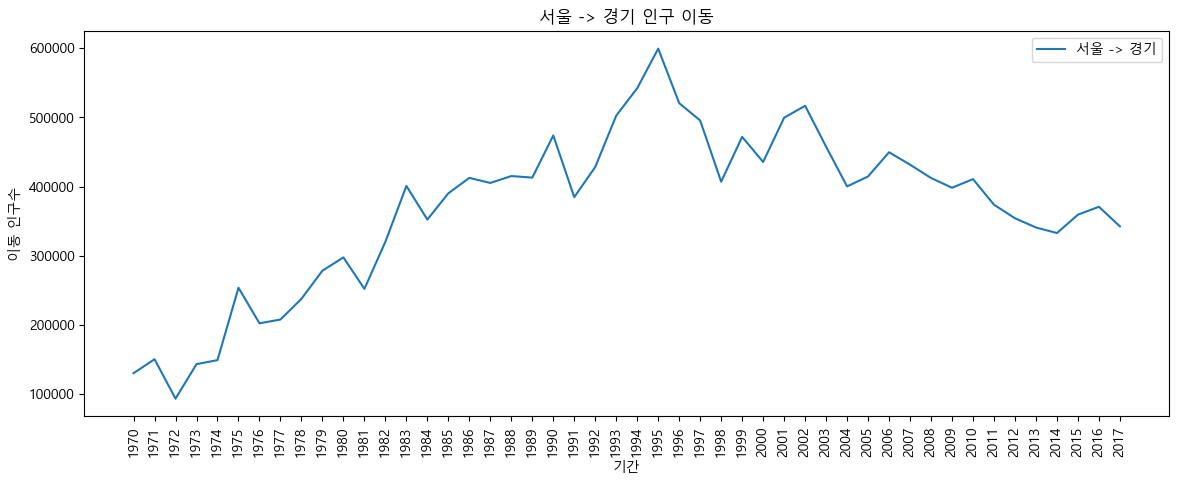

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

df = pd.read_excel('./data/시도별_전출입_인구수.xlsx')

df = df.ffill()

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop(['전출지별'], axis=1, inplace=True)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.figure(figsize = (14,5))

plt.xticks(rotation = 'vertical')

plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')

plt.xlabel('기간')
plt.ylabel('이동 인구수')

# loc = 'best' best 옵션은 Matplotlib이 최적의 위치를 자동으로 선택함 , 다른 옵션들도 있음
# labels는 범례에 표시될 레이블 리스트를 설정한다.
plt.legend(labels = ['서울 -> 경기'], loc = 'best')

plt.show()